In [67]:
import numpy as np
import matplotlib.pyplot as plt

## Este grafico corresponde al campo magnético dentro y fuera de una esfera
## cargada con densidad de carga superficial sigma que rota con una frecuencia
## omega. El calculo fue realizado analiticamente resolviendo la ecuacion
## de Poisson  nabla² A = 4pi/c J y luego calculando el rotor de a

# Definicion de las variables y los campos a calcular
sigma = 1
omega = 1./86400
a = 3.
b = 5

def R(x,z):
    return np.sqrt(x**2 + z**2)

def CalcularCampoAdentro(x,z):
    cte = (4*np.pi*sigma*omega)/3.

    Bx = cte*(  x/(R(x,z)**2)   -   x/(R(x,z)**3)   )
    Bz = cte*(  x**2/(z*R(x,z)**2)  -   z/(R(x,z)**3)   )
    return Bx, Bz  

def CalcularCampoAfuera(x,z):
    cte = 4*np.pi*sigma*omega/3.

    Bx = cte*( (x*a**3)/(R(x,z)**5) + (2*x*a**3)/(R(x,z)**5 ) )
    Bz = cte*( ((x**2)*(a**3))/( z*R(x,z)**5) - (2*z*a**3)/(R(x,z)**5) )

    return Bx, Bz

In [66]:
## Creo una grilla de datos, uno para x y otro apra z sobre el cual pueda calcular los valores del campo
## en cada punto del espacio
x_vals = np.linspace(-a,a,100)
z_vals = np.linspace(-a,a,100)
x_mesh, z_mesh = np.meshgrid(x_vals,z_vals)
Bx_mesh, Bz_mesh = CalcularCampoAdentro(x_mesh, z_mesh)

x2_vals = np.linspace(-b,b,100)
z2_vals = np.linspace(-b,b,100)
x2_mesh, z2_mesh = np.meshgrid(x2_vals,z2_vals)
Bx2_mesh, Bz2_mesh = CalcularCampoAfuera(x2_mesh,z2_mesh)

## Defino una máscara para truncar los valores que no corresponden
region_afuera = np.sqrt( x_mesh**2+z_mesh**2) > a
region_adentro = np.sqrt( x2_mesh**2+z2_mesh**2) < a
## Aplico la maskara
Bx_mesh = np.ma.array(Bx_mesh, mask=region_afuera)
Bz_mesh = np.ma.array(Bz_mesh, mask=region_afuera)

Bx2_mesh = np.ma.array(Bx2_mesh, mask=region_adentro)
Bz2_mesh = np.ma.array(Bz2_mesh, mask=region_adentro)


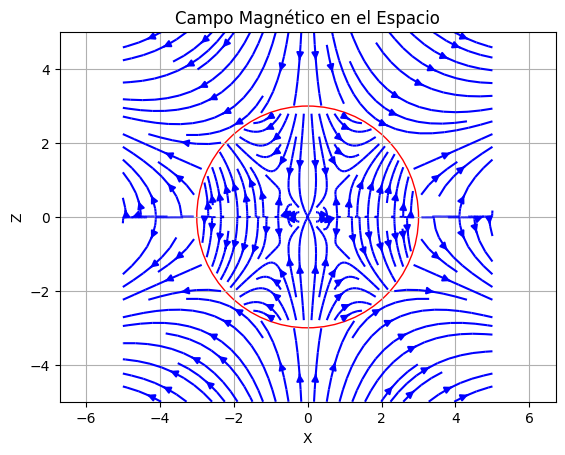

In [65]:
## Grafico del campo magnético en todo el espacio
plt.streamplot(x_mesh,z_mesh,Bx_mesh,Bz_mesh, color="blue")
plt.streamplot(x2_mesh,z2_mesh,Bx2_mesh,Bz2_mesh, color="blue")

## Circulo que define el borde del cascarón esferico cargado
borde = plt.Circle( (0,0), a , color= "red", fill = False )
plt.gca().add_patch(borde)


plt.xlabel('X')
plt.ylabel('Z')
plt.title('Campo Magnético en el Espacio')
plt.grid(True)
plt.axis('equal') 
plt.show()